In [1]:
# Importa todas as funções de dtree.py
from dtree import growDecisionTreeFrom, prune, classify
from utils import loadCSV, dotgraph

In [2]:
# Carrega arquivo csv e obtem um dicionario de atributos e os dados de treinamento
dcHeadings, dataCSV = loadCSV('dataset_preenchido_reduzido.csv')
type(dataCSV)

pandas.core.frame.DataFrame

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

# Separando dados de treinamento e de teste
data = dataCSV.iloc[:, 0:-1].values
results = dataCSV.iloc[:, -1].values
trainingData, testData, trainingResults, testResults = train_test_split(data, results)# 75% para treino e 25% para teste

training = list(np.c_[trainingData, trainingResults])
evaluation = list(np.c_[testData, testResults])

In [4]:
decisionTree = growDecisionTreeFrom(training)  # Geração da árvore de decisão
prune(decisionTree, 0.8)                       # Poda da árvore (método de pós-poda)     

Depois de gerada a árvore de decisão com os dados de treinamento, e realizado a poda, obtemos o seguinte resultado:

In [5]:
import pydotplus

# Gera a visualização da árvore usando Graphviz
dot_data = dotgraph(decisionTree, dcHeadings)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("alunos.png")

True

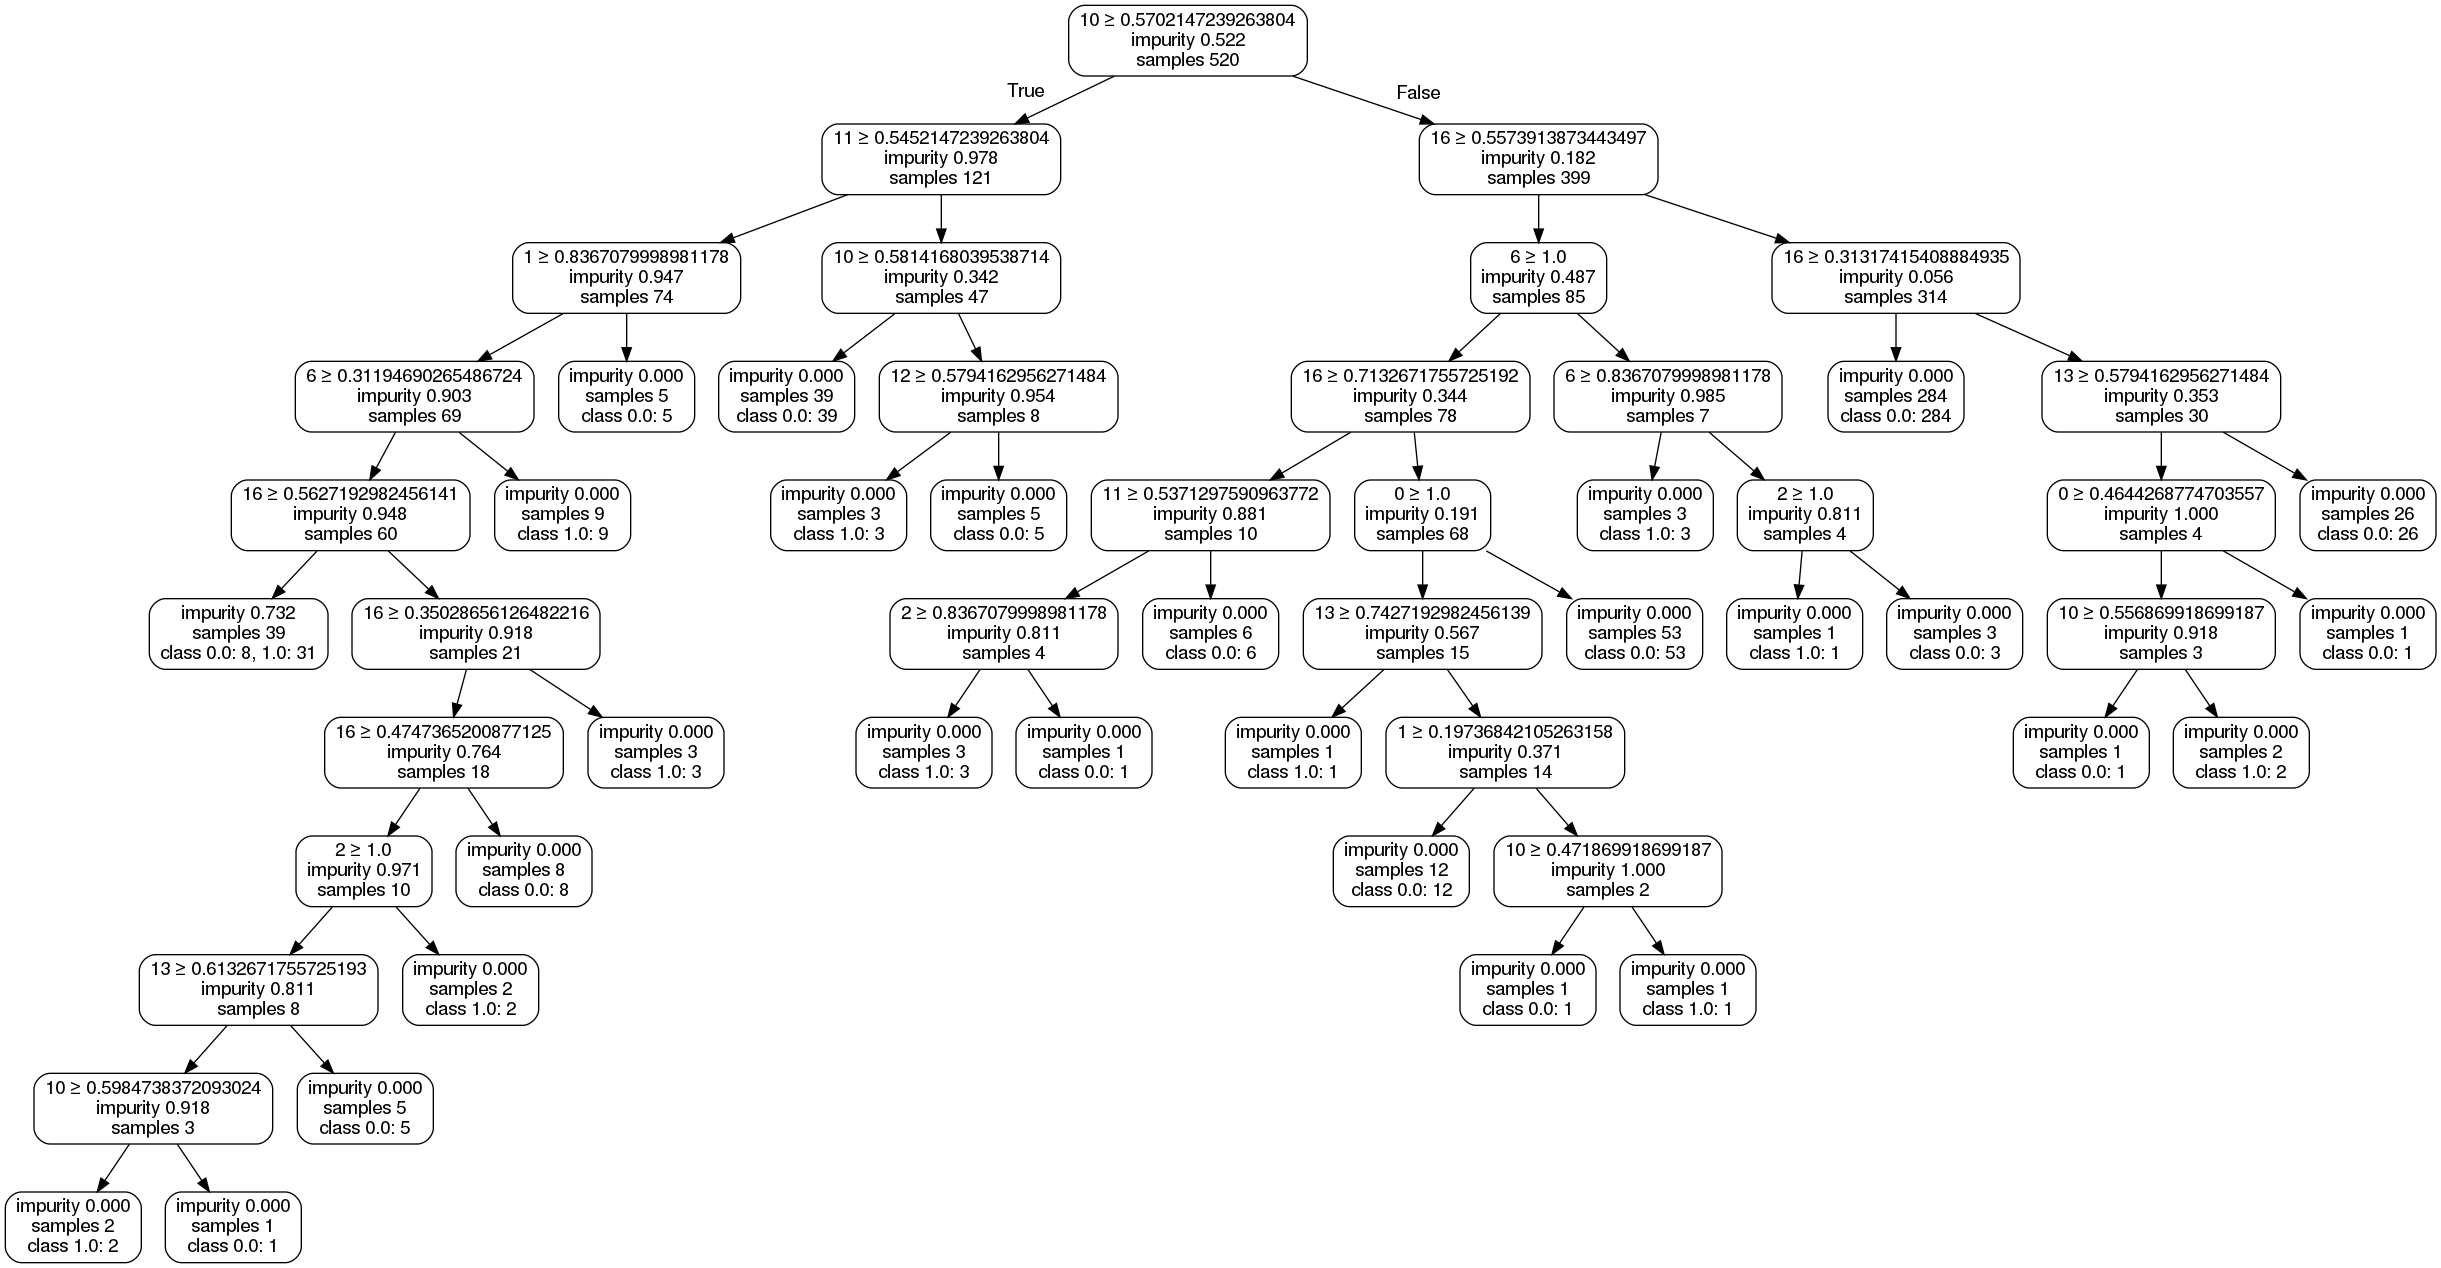

In [6]:
from IPython.display import Image, display

# Mostra a árvore de decisão gerada
display(Image(filename='alunos.png'))

In [7]:
# Realiza teste de acurácia com os dados de teste
print(classify(evaluation, decisionTree, accuracyTest=True))

{'Acertos': 160, 'Erros': 14, 'Acurácia': 0.9195}
